In [81]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns


In [82]:
def gerenate_training(num_points):
    x1 = torch.rand(num_points, 1)
    y1 = torch.rand(num_points, 1)
    x_e = 0.5 + torch.rand(num_points) * (0.6 - 0.5)
    y_e = 0.5 + torch.rand(num_points) * (0.6 - 0.5)
    x = torch.cat([x1, x_e.view(-1,1)], dim=0)
    y = torch.cat(
        [y1, y_e.view(-1,1)],
        dim=0,
    )

    return x, y


In [134]:
h = 0.01
k = 0.01
x = torch.arange(0, 1, h)
y = torch.arange(0, 1, k)
X, Y = torch.meshgrid(x, y)
X = X.flatten()
Y = Y.flatten()

In [135]:
def initial_condition(x, y):

    Cp = torch.full_like(x, 0)

    for i, (xx, yy) in enumerate(zip(x, y)):
        if ((xx >= 0.5) and (xx <= 0.6)) and ((yy >= 0.5) and (yy <= 0.6)):
            Cp[i] = 0.2

    return Cp

In [136]:
Cp = initial_condition(X.reshape(-1,1),Y.reshape(-1,1))
Cp.shape

torch.Size([10000, 1])

In [137]:
model = nn.Sequential(
    nn.Linear(2, 20),
    nn.Tanh(),
    nn.Linear(20, 30),
    nn.Tanh(),
    nn.Linear(30, 30),
    nn.Tanh(),
    nn.Linear(30, 20),
    nn.Tanh(),
    nn.Linear(20, 20),
    nn.Tanh(),
    nn.Linear(20, 1),
)
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=20, bias=True)
  (1): Tanh()
  (2): Linear(in_features=20, out_features=30, bias=True)
  (3): Tanh()
  (4): Linear(in_features=30, out_features=30, bias=True)
  (5): Tanh()
  (6): Linear(in_features=30, out_features=20, bias=True)
  (7): Tanh()
  (8): Linear(in_features=20, out_features=20, bias=True)
  (9): Tanh()
  (10): Linear(in_features=20, out_features=1, bias=True)
)


In [138]:
loss_fn = nn.MSELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [141]:
n_epochs = 10000
batch_size = 1000
 
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        xbatch = X[i:i+batch_size]
        ybatch = Y[i:i+batch_size]

        input = torch.cat([xbatch.reshape(-1,1), ybatch.reshape(-1,1)], dim=1)

        Cp_pred = model(input)

        Cpbatch = Cp[i:i+batch_size]
        
        loss = loss_fn(Cp_pred, Cpbatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    if epoch % 100 == 0:
        print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 4.26299411628861e-05
Finished epoch 100, latest loss 6.834427495050477e-06
Finished epoch 200, latest loss 1.647544991101313e-06
Finished epoch 300, latest loss 3.205526581950835e-06
Finished epoch 400, latest loss 1.0502778877707897e-06
Finished epoch 500, latest loss 6.408633339560765e-07
Finished epoch 600, latest loss 3.244419986003777e-06
Finished epoch 700, latest loss 8.033101721593994e-07
Finished epoch 800, latest loss 1.0067012681247434e-06
Finished epoch 900, latest loss 2.5748130383362877e-07
Finished epoch 1000, latest loss 3.5365908956919156e-07
Finished epoch 1100, latest loss 2.856103265003185e-07
Finished epoch 1200, latest loss 1.0888428647604087e-07
Finished epoch 1300, latest loss 9.74622551552784e-08
Finished epoch 1400, latest loss 8.704152492100548e-07
Finished epoch 1500, latest loss 4.709610124109531e-08
Finished epoch 1600, latest loss 5.24385825428908e-07
Finished epoch 1700, latest loss 7.985409666844134e-08
Finished epoch 1800,

<Figure size 1800x900 with 0 Axes>

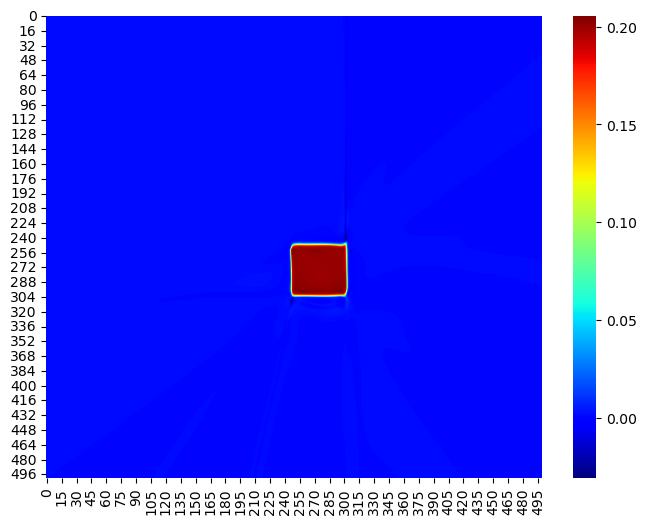

In [142]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=[18, 9])

x_vals = torch.linspace(0, 1, 500)
y_vals = torch.linspace(0, 1, 500)
X, Y = torch.meshgrid(x_vals, y_vals)


with torch.no_grad():
    input_data = torch.stack([X.flatten(), Y.flatten()], dim=1)

    solution = model(input_data)

    Cp = solution
    Cp = Cp.reshape(X.shape, Y.shape)

    solution = model(input_data).reshape(X.shape, Y.shape)

    plt.figure(figsize=(8, 6))
    sns.heatmap(solution, cmap="jet")


ValueError: only one element tensors can be converted to Python scalars

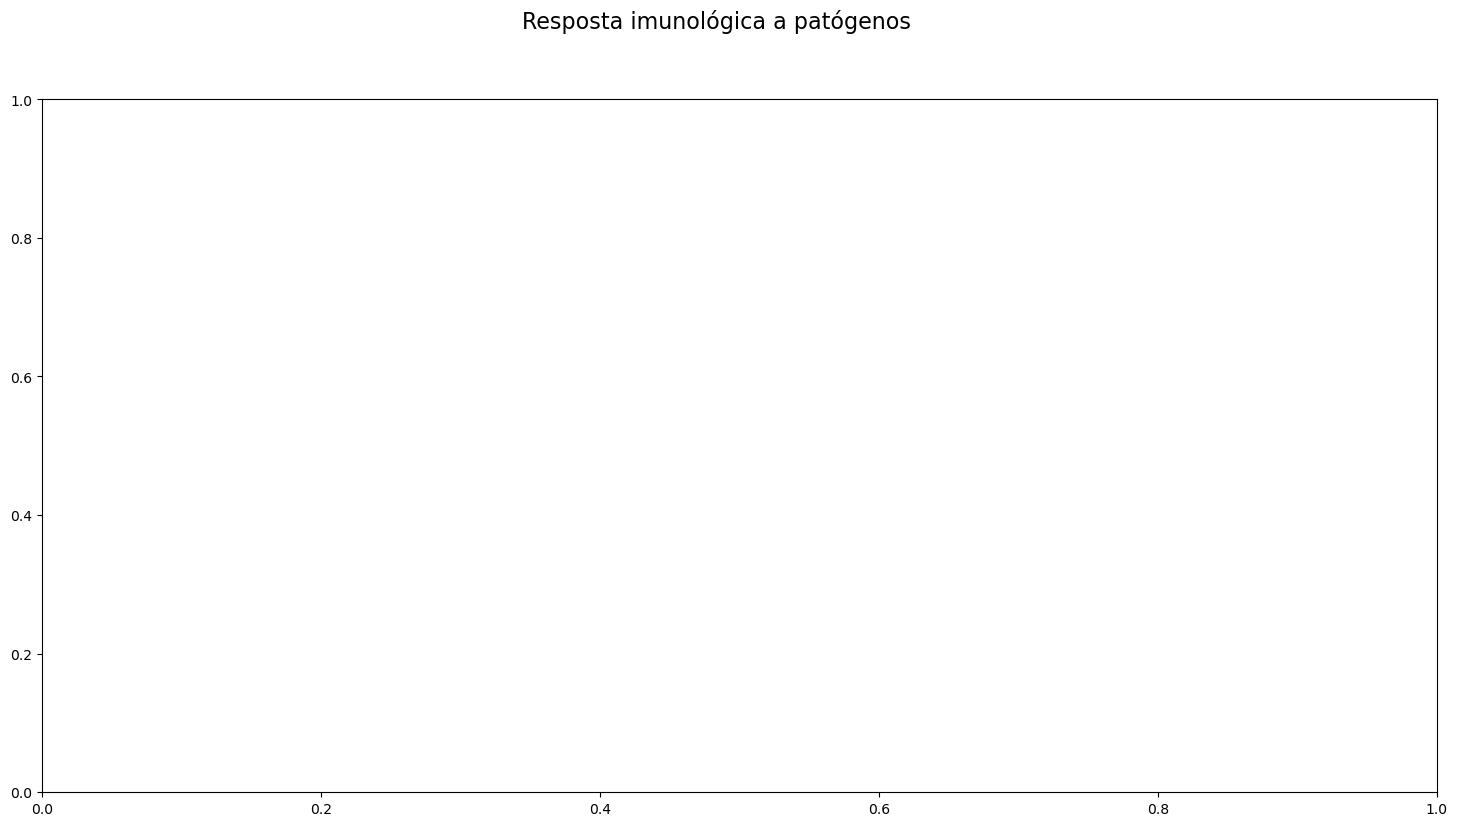

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

fig = plt.figure(figsize=[18, 9])

fig.suptitle('Resposta imunológica a patógenos', fontsize=16)

# vmin = 0
# vmax = np.max([torch.max(Cp),torch.max(Cl)])

# Plotango 3D
ax = fig.add_subplot(1, 1, 1)

contour = ax.contourf(X, Y, Cp[0], cmap="jet")
ax.set_title("Concentração de bactérias")
ax.set_xlabel("X")
ax.set_ylabel("Y")
colobar = fig.colorbar(contour)

plt.show()